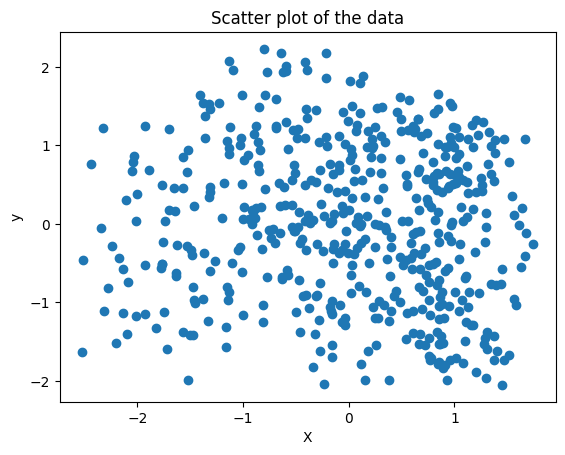

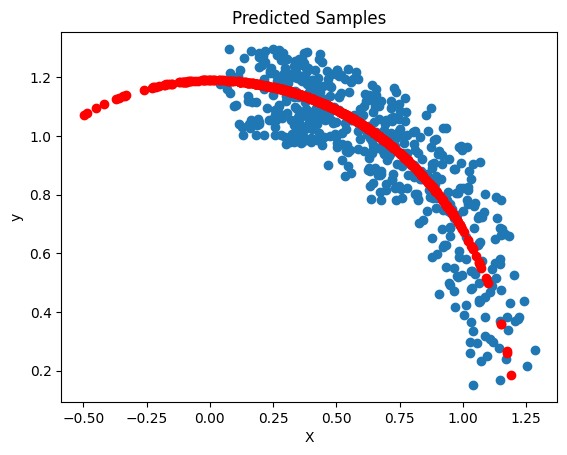

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(0)

# Generate training data based on the circle equation
x = np.random.rand(500, 1)
r = 1
y = np.sqrt(r*r - x*x)

# Add noise
noise_var = 0.3
x = x + np.random.rand(500, 1)*noise_var
y = y + np.random.rand(500, 1)*noise_var

# Convert the data pair to polar coordinates
r = np.sqrt(np.square(x)+np.square(y))
theta = np.arctan2(y, x)
X = theta
y = r

# Normalize new data pairs
mean_X = np.mean(X)
mean_y = np.mean(y)
std_x = np.std(X)
std_y = np.std(y)

X -= mean_X
y -= mean_y
X = X / std_x
y = y / std_y

# Visualize the data
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Scatter plot of the data')
plt.show()


# Define the linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        hidden_enc = 10
        hidden_dec = 10
        self.fc1 = nn.Linear(1, hidden_enc)
        self.fc2 = nn.Linear(hidden_enc, hidden_dec)
        self.fc3 = nn.Linear(hidden_dec, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = LinearRegression()
criterion = nn.SmoothL1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Convert NumPy arrays to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Training loop
n_iterations = 2000
for iteration in range(n_iterations):
    optimizer.zero_grad()
    y_pred = model(X_tensor)
    loss = criterion(y_tensor, y_pred)
    loss.backward()
    optimizer.step()

# Generate inference input data
X_inf = np.random.normal(0.5, 1 , (500, 1))
X_tensor = torch.tensor(X_inf, dtype=torch.float32)

# make prediction on the input
y_pred = model(X_tensor).detach().numpy()

# The prediction is in the normalized polar coordinates domain, so we can use
# Noise to generate new data.
# In order to convert back to the image domain, we first need to rescale and add
# back the mean

# Training data
X = X * std_x
y = y * std_y
X += mean_X
y += mean_y

# Inference data
X_inf = X_inf * std_x + mean_X
y_pred = y_pred * std_y + mean_y



# # Inference data
# X_inf = X_inf
# y_pred = y_pred


# Convert everything back to the x, y coordinates
# Training data
theta = X
r = y
X = np.cos(theta)*r
y = np.sin(theta)*r

# Inference data
r_pred = y_pred
y_pred = np.sin(X_inf)*r_pred
x_pred = np.cos(X_inf)*r_pred

# Plot the prediction and
plt.scatter(X, y)
plt.scatter(x_pred, y_pred, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Predicted Samples')
plt.show()

